In [1]:
from numpy import linspace, zeros, cos, sin, pi, array, dot
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Cálculos Físicos del Sistema
mu = (6.67e-11)*(2e30)*1 # Constante del Sistema Solar
AU = 1.5e11 # [m] Unidad Astronómica

ener = lambda r,v: ((v*1e3)**2)/2 - mu/(r*AU) # Calcula la Energía Total del Sistema
sma = lambda E: (-mu/(2*E))/AU # Calcula el Semieje Mayor de la Órbita
ecc = lambda r,a: abs(((r)/a)-1) # Calcula la Excentricidad dada la distancia y el Semieje

def rd(th,a,e,w,inc): # Función Polar para la Distancia Radial en Función de Theta, Excentricidad, y Argumento del Periapsis
    w = w*pi/180
    inc = -inc*pi/180
    
    cz = cos(w)
    sz = sin(w)
    
    cy = cos(inc)
    sy = sin(inc)
    
    r = (a*(1-e**2))/(1-e*cos(th)) #Cálculo de Distancia Radial en Coord Polares
    XY = array([[r*cos(th)],[r*sin(th)],[0]]) #Coordenadas Cartesianas en forma Matricial
    MRY = array([[cy,0,sy],[0,1,0],[-sy,0,cy]]) #Matriz de Rotación con Inclinación (Eje y)
    MRZ = array([[cz,-sz,0],[sz,cz,0],[0,0,1]]) #Matriz de Rotación con Argumento (Eje z)

    XYinc = dot(MRY,XY) #Producto de Matriz Rotación y Coordenadas
    XYrot = dot(MRZ,XYinc)
    
    return XYrot

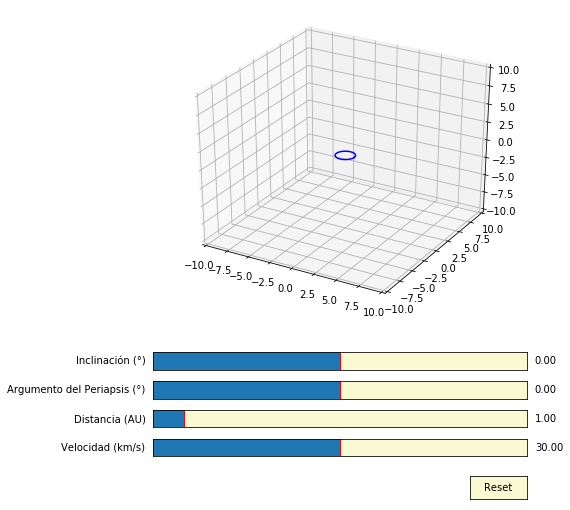

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.25, bottom=0.35)
        
r0 = 1 # Distancia Inicial (AU)
v0 = 30 # Velocidad Inicial (km/s)
a0 = sma(ener(r0,v0)) # Semieje Mayor (AU)
ec0 = ecc(r0,a0) # Eccentricidad
col = 'b' # Color de la Órbita
w0 = 0 # Argumento del Periapsis
inc0 = 0 # Inclinación de la Órbita

delta_v = 0.1 # Salto del Slider de Velocidad 
delta_r = 0.05 # Salto del Slider de Distancia
delta_w = 1 # Salto del Slider del Arg del Periapsis
delta_i = 1 # Salto del Slider de Inclinación

ths = linspace(0,2*pi,100) # Thetas
rs = zeros((100,3,1)) # Array vacío de Distancias
for i in range(100):
    rs[i] = rd(ths[i],a0,ec0,w0,inc0)
    
x = rs[:,0].flatten()
y = rs[:,1].flatten()
z = rs[:,2].flatten()

l, = ax.plot(x,y,z,'b')

plt.xlim([-10,10])
plt.ylim([-10,10])
ax.set_zlim(-10,10)

axcolor = 'lightgoldenrodyellow'
axvel = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axdist = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axarg = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
axincl = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)

svel = Slider(axvel, 'Velocidad (km/s)', 0.0, 60.0, valinit=v0, valstep=delta_v)
sdist = Slider(axdist, 'Distancia (AU)', 0.2, 10.0, valinit=r0, valstep=delta_r)
sinc = Slider(axincl, 'Inclinación (°)', -90.,90., valinit=inc0, valstep=delta_i)
sarg = Slider(axarg, 'Long del Nodo Ascendente (°)', -180.,180., valinit=w0, valstep=delta_w)


def update(val):
    r = sdist.val
    v = svel.val
    w = sarg.val
    inc = sinc.val
    
    a = sma(ener(r,v))
    ec = ecc(r,a)
    for i in range(100): rs[i] = rd(ths[i],a,ec,w,inc) 
        
    x = rs[:,0].flatten()
    y = rs[:,1].flatten()
    z = rs[:,2].flatten()
    
    if ec>=1: col = 'r'
    else: col = 'b'
    
    l.set_data(x,y)
    l.set_3d_properties(z)
    l.set_color(col)
    fig.canvas.draw_idle()
svel.on_changed(update)
sdist.on_changed(update)
sarg.on_changed(update)
sinc.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    svel.reset()
    sdist.reset()
    sarg.reset()
    sinc.reset()
button.on_clicked(reset)

plt.show()